In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
# --- Step 2: Load and Prepare the Dataset ---


df = pd.read_csv('Mall_Customers.csv')

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


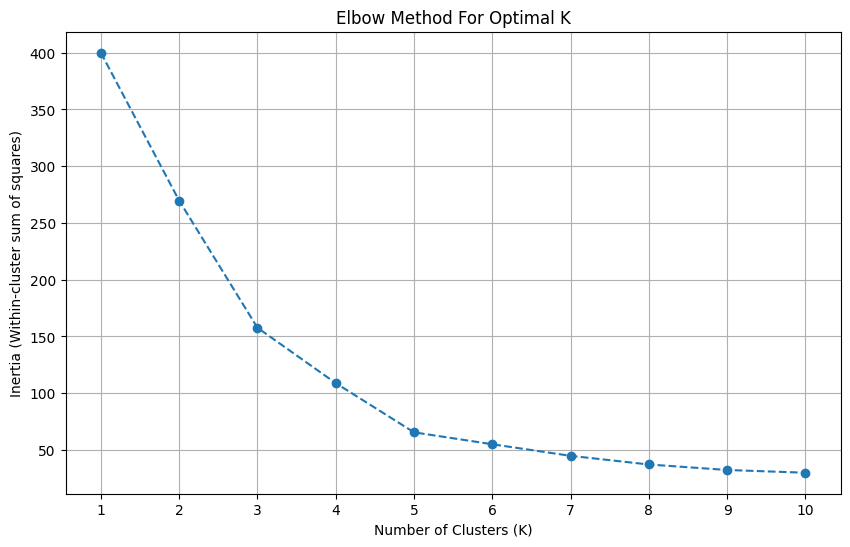

In [ ]:
# --- Step 3: Determine the Optimal Number of Clusters (K) using the Elbow Method 
inertia_scores = []  # List to store the inertia for each K
k_range = range(1, 11)  # We will test K from 1 to 10

# Loop through each possible number of clusters.
for k in k_range:
    # Initialize K-Means. 'k-means++' is a smart initialization method.
    # 'n_init=10' runs the algorithm 10 times with different centroid seeds and picks the best one.
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    
    # Fit the model to our scaled data.
    kmeans.fit(X_scaled)
    
    # Append the calculated inertia to our list.
    inertia_scores.append(kmeans.inertia_)

# Visualize the Elbow Method plot.
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_scores, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# From the plot, the optimal number of clusters is visually identified as K=5.
optimal_k = 5



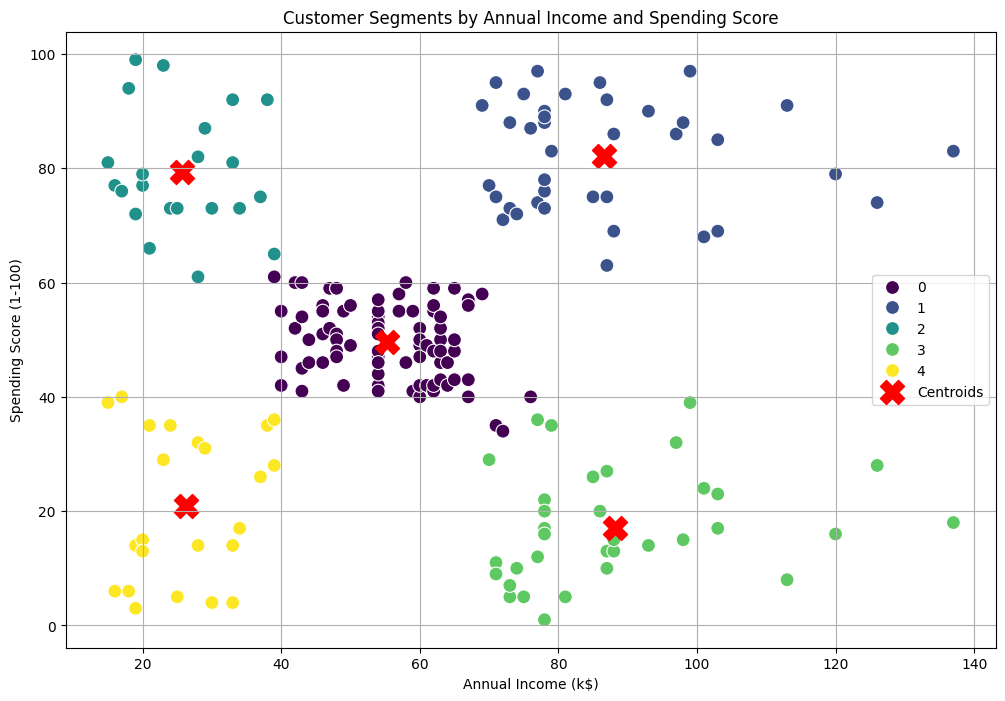

In [ ]:
# --- Step 4: Fit the K-Means Model and Visualize the Clusters ---

# Now that we have the optimal K, we train our final K-Means model.
kmeans_final = KMeans(n_clusters=optimal_k, init='k-means++', n_init=10, random_state=42)

# Fit the model to the scaled data and get the cluster prediction for each data point.
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add the resulting cluster labels to our original DataFrame for analysis.
df['Cluster'] = cluster_labels

# Create a scatter plot to visualize the customer segments.
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',  # Color points by the assigned cluster
    data=df,
    palette='viridis',  # A visually appealing color scheme
    s=100,             # Marker size
    legend='full'
)


centroids = scaler.inverse_transform(kmeans_final.cluster_centers_)

# Plot the centroids on top of the clusters as red 'X' markers.
plt.scatter(
    centroids[:, 0],  # Centroid X-coordinate (Annual Income)
    centroids[:, 1],  # Centroid Y-coordinate (Spending Score)
    s=300,            # Marker size
    c='red',
    marker='X',
    label='Centroids'
)

# Add titles and labels for clarity.
plt.title('Customer Segments by Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# --- Step 5: Evaluate the Clustering with the Silhouette Score ---


silhouette_avg = silhouette_score(X_scaled, cluster_labels)

print(f"Optimal number of clusters (K) found: {optimal_k}")
print(f"The Silhouette Score for K={optimal_k} is: {silhouette_avg:.4f}")

# Display a count of customers in each identified segment.
print("\nNumber of customers in each cluster:")
print(df['Cluster'].value_counts().sort_index())

Optimal number of clusters (K) found: 5
The Silhouette Score for K=5 is: 0.5547

Number of customers in each cluster:
Cluster
0    81
1    39
2    22
3    35
4    23
Name: count, dtype: int64
